<a href="https://colab.research.google.com/github/habtamuadargaso/Python-for-Data-Science-/blob/main/Cleaning_Data_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Numeric data or ... ?

In this exercise, and throughout this chapter, you'll be working with bicycle ride sharing data in San Francisco called ride_sharing. It contains information on the start and end stations, the trip duration, and some user information for a bike sharing service.

The user_type column contains information on whether a user is taking a free ride and takes on the following values:

1 for free riders.

2 for pay per ride.

3 for monthly subscribers.

In this instance, you will print the information of ride_sharing using .info() and see a firsthand example of how an incorrect data type can flaw your analysis of the dataset. The pandas package is imported as pd.



```
Print the information of ride_sharing.
Use .describe() to print the summary statistics of the user_type column from ride_sharing
```



In [ ]:
# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

In [ ]:
# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

# Summing strings and concatenating numbers

In the previous exercise, you were able to identify that category is the correct data type for user_type and convert it in order to extract relevant statistical summaries that shed light on the distribution of user_type.

Another common data type problem is importing what should be numerical values as strings, as mathematical operations such as summing and multiplication lead to string concatenation, not numerical outputs.

In this exercise, you'll be converting the string column duration to the type int. Before that however, you will need to make sure to strip "minutes" from the column in order to make sure pandas reads it as numerical. The pandas package has been imported as pd.

In [ ]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing['duration_time'].mean())



```

         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
11.389052795031056```



In [ ]:
# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
# ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())



```
# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
# ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())
count     25760
unique        2
top          27
freq      13274
Name: tire_sizes, dtype: int64
```



In [ ]:
# Convert ride_date to date
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date']).dt.date

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())




```
# Convert ride_date to date
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date']).dt.date

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())
2023-01-03
```



# Finding duplicates

A new update to the data pipeline feeding into ride_sharing has added the ride_id column, which represents a unique identifier for each ride.

The update however coincided with radically shorter average ride duration times and irregular user birth dates set in the future. Most importantly, the number of rides taken has increased by 20% overnight, leading you to think there might be both complete and incomplete duplicates in the ride_sharing DataFrame.

In this exercise, you will confirm this suspicion by finding those duplicates. A sample of ride_sharing is in your environment, as well as all the packages you've been working with thus far.



```
1.Find duplicated rows of ride_id in the ride_sharing DataFrame while setting keep to False.

2. Subset ride_sharing on duplicates and sort by ride_id and assign the results to duplicated_rides.
3 . Print the ride_id, duration and user_birth_year columns of duplicated_rides in that order.
```



In [ ]:
# Find duplicates
duplicates = ride_sharing.duplicated(subset='ride_id',keep = False )

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('ride_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration','user_birth_year']])



```
# Find duplicates
duplicates = ride_sharing.duplicated(subset='ride_id',keep = False )

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('ride_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration','user_birth_year']])
    ride_id  duration  user_birth_year
22       33        10             1979
39       33         2             1979
53       55         9             1985
65       55         9             1985
74       71        11             1997
75       71        11             1997
76       89         9             1986
77       89         9             2060```



# Treating duplicates

In the last exercise, you were able to verify that the new update feeding into ride_sharing contains a bug generating both complete and incomplete duplicated rows for some values of the ride_id column, with occasional discrepant values for the user_birth_year and duration columns.

In this exercise, you will be treating those duplicated rows by first dropping complete duplicates, and then merging the incomplete duplicate rows into one while keeping the average duration, and the minimum user_birth_year for each set of incomplete duplicate rows.



```
Drop complete duplicates in ride_sharing and store the results in ride_dup.
Create the statistics dictionary which holds minimum aggregation for user_birth_year and mean aggregation for duration.

Drop incomplete duplicates by grouping by ride_id and applying the aggregation in statistics.

Find duplicates again and run the assert statement to verify de-duplication.```



In [ ]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()
# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0



```
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()
# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0


```



# Finding consistency
In this exercise and throughout this chapter, you'll be working with the airlines DataFrame which contains survey responses on the San Francisco Airport from airline customers.

The DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction. Another DataFrame named categories was created, containing all correct possible values for the survey columns.

In this exercise, you will use both of these DataFrames to find survey answers with inconsistent values, and drop them, effectively performing an outer and inner join on both these DataFrames as seen in the video exercise. The pandas package has been imported as pd, and the airlines and categories DataFrames are in your environment.



```
Print the categories DataFrame and take a close look at all possible correct categories of the survey columns.

Print the unique values of the survey columns in airlines using the .unique() method.

```



In [ ]:
# Print categories DataFrame
print(categories)

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines["safety"].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")




```
# Print categories DataFrame
print(categories)

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines["safety"].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")


      cleanliness           safety          satisfaction
0           Clean          Neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satisfied
3  Somewhat dirty      Very unsafe  Somewhat unsatisfied
4           Dirty  Somewhat unsafe      Very unsatisfied
Cleanliness:  ['Clean', 'Average', 'Unacceptable', 'Somewhat clean', 'Somewhat dirty', 'Dirty']
Categories (6, object): ['Average', 'Clean', 'Dirty', 'Somewhat clean', 'Somewhat dirty', 'Unacceptable'] 

Safety:  ['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe']
Categories (5, object): ['Neutral', 'Somewhat safe', 'Somewhat unsafe', 'Very safe', 'Very unsafe'] 

Satisfaction:  ['Very satisfied', 'Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied', 'Very unsatisfied']
Categories (5, object): ['Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied', 'Very satisfied', 'Very unsatisfied'] ```



# Finding consistency

In this exercise and throughout this chapter, you'll be working with the airlines DataFrame which contains survey responses on the San Francisco Airport from airline customers.


The DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction. Another DataFrame named categories was created, containing all correct possible values for the survey columns.


In this exercise, you will use both of these DataFrames to find survey answers with inconsistent values, and drop them, effectively performing an outer and inner join on both these DataFrames as seen in the video exercise. The pandas package has been imported as pd, and the airlines and categories DataFrames are in your environment.



```
Create a set out of the cleanliness column in airlines using set() and find the inconsistent category by finding the difference in the cleanliness column of categories.

Find rows of airlines with a cleanliness value not in categories and print the output.


```



In [ ]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[~cat_clean_rows])



```
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[~cat_clean_rows])
        id       day        airline        destination    dest_region dest_size boarding_area   dept_time  wait_min     cleanliness         safety        satisfaction
0     1351   Tuesday    UNITED INTL             KANSAI           Asia       Hub  Gates 91-102  2018-12-31     115.0           Clean        Neutral      Very satisfied
1      373    Friday         ALASKA  SAN JOSE DEL CABO  Canada/Mexico     Small   Gates 50-59  2018-12-31     135.0           Clean      Very safe      Very satisfied
2     2820  Thursday          DELTA        LOS ANGELES        West US       Hub   Gates 40-48  2018-12-31      70.0         Average  Somewhat safe             Neutral
3     1157   Tuesday      SOUTHWEST        LOS ANGELES        West US       Hub   Gates 20-39  2018-12-31     190.0           Clean      Very safe  Somewhat satisfied
5      634  Thursday         ALASKA             NEWARK        East US       Hub   Gates 50-59  2018-12-31     140.0  Somewhat clean      Very safe      Very satisfied
...    ...       ...            ...                ...            ...       ...           ...         ...       ...             ...            ...                 ...
2804  1475   Tuesday         ALASKA       NEW YORK-JFK        East US       Hub   Gates 50-59  2018-12-31     280.0  Somewhat clean        Neutral  Somewhat satisfied
2805  2222  Thursday      SOUTHWEST            PHOENIX        West US       Hub   Gates 20-39  2018-12-31     165.0           Clean      Very safe      Very satisfied
2806  2684    Friday         UNITED            ORLANDO        East US       Hub   Gates 70-90  2018-12-31      92.0           Clean      Very safe      Very satisfied
2807  2549   Tuesday        JETBLUE         LONG BEACH        West US     Small    Gates 1-12  2018-12-31      95.0           Clean  Somewhat safe      Very satisfied
2808  2162  Saturday  CHINA EASTERN            QINGDAO           Asia     Large    Gates 1-12  2018-12-31     220.0           Clean      Very safe  Somewhat satisfied

[2474 rows x 12 columns]
```





```
In [1]: categories
Out[1]:
      cleanliness           safety          satisfaction
0           Clean          Neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satisfied
3  Somewhat dirty      Very unsafe  Somewhat unsatisfied
4           Dirty  Somewhat unsafe      Very unsatisfied

cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

In [2]: cat_clean
Out[2]:
{'Unacceptable'}

cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

In [3]: cat_clean_rows
Out[3]:
0       False
1       False
2       False
3       False
4        True
        ...  
2804    False
2805    False
2806    False
2807    False
2808    False
Name: cleanliness, Length: 2477, dtype: bool

In [4]: print(airlines[cat_clean_rows])
       id        day           airline  destination  dest_region dest_size  \
4    2992  Wednesday          AMERICAN        MIAMI      East US       Hub   
18   2913     Friday  TURKISH AIRLINES     ISTANBUL  Middle East       Hub   
100  2321  Wednesday         SOUTHWEST  LOS ANGELES      West US       Hub   

    boarding_area   dept_time  wait_min   cleanliness         safety  \
4     Gates 50-59  2018-12-31     559.0  Unacceptable      Very safe   
18   Gates 91-102  2018-12-31     225.0  Unacceptable      Very safe   
100   Gates 20-39  2018-12-31     130.0  Unacceptable  Somewhat safe   

           satisfaction  
4    Somewhat satisfied  
18   Somewhat satisfied  
100  Somewhat satisfied```



In [ ]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

# Print rows with consistent categories only
print(airlines[~cat_clean_rows])



```

# Print rows with consistent categories only
print(airlines[~cat_clean_rows])
       id        day           airline  destination  dest_region dest_size boarding_area   dept_time  wait_min   cleanliness         safety        satisfaction
4    2992  Wednesday          AMERICAN        MIAMI      East US       Hub   Gates 50-59  2018-12-31     559.0  Unacceptable      Very safe  Somewhat satisfied
18   2913     Friday  TURKISH AIRLINES     ISTANBUL  Middle East       Hub  Gates 91-102  2018-12-31     225.0  Unacceptable      Very safe  Somewhat satisfied
100  2321  Wednesday         SOUTHWEST  LOS ANGELES      West US       Hub   Gates 20-39  2018-12-31     130.0  Unacceptable  Somewhat safe  Somewhat satisfied
        id       day        airline        destination    dest_region dest_size boarding_area   dept_time  wait_min     cleanliness         safety        satisfaction
0     1351   Tuesday    UNITED INTL             KANSAI           Asia       Hub  Gates 91-102  2018-12-31     115.0           Clean        Neutral      Very satisfied
1      373    Friday         ALASKA  SAN JOSE DEL CABO  Canada/Mexico     Small   Gates 50-59  2018-12-31     135.0           Clean      Very safe      Very satisfied
2     2820  Thursday          DELTA        LOS ANGELES        West US       Hub   Gates 40-48  2018-12-31      70.0         Average  Somewhat safe             Neutral
3     1157   Tuesday      SOUTHWEST        LOS ANGELES        West US       Hub   Gates 20-39  2018-12-31     190.0           Clean      Very safe  Somewhat satisfied
5      634  Thursday         ALASKA             NEWARK        East US       Hub   Gates 50-59  2018-12-31     140.0  Somewhat clean      Very safe      Very satisfied
...    ...       ...            ...                ...            ...       ...           ...         ...       ...             ...            ...                 ...
2804  1475   Tuesday         ALASKA       NEW YORK-JFK        East US       Hub   Gates 50-59  2018-12-31     280.0  Somewhat clean        Neutral  Somewhat satisfied
2805  2222  Thursday      SOUTHWEST            PHOENIX        West US       Hub   Gates 20-39  2018-12-31     165.0           Clean      Very safe      Very satisfied
2806  2684    Friday         UNITED            ORLANDO        East US       Hub   Gates 70-90  2018-12-31      92.0           Clean      Very safe      Very satisfied
2807  2549   Tuesday        JETBLUE         LONG BEACH        West US     Small    Gates 1-12  2018-12-31      95.0           Clean  Somewhat safe      Very satisfied
2808  2162  Saturday  CHINA EASTERN            QINGDAO           Asia     Large    Gates 1-12  2018-12-31     220.0           Clean      Very safe  Somewhat satisfied

[2474 rows x 12 columns]

```



In [ ]:
# Print unique values of both columns
print(airlines['dest_region'].value_counts())
print(airlines['dest_size'].value_counts())



```
# Print unique values of both columns
print(airlines['dest_region'].value_counts())
print(airlines['dest_size'].value_counts())
West US                  864
East US                  367
Europe                   272
Midwest US               251
Asia                     226
Canada/Mexico            198
eur                       79
EAST US                   69
Australia/New Zealand     60
Middle East               48
Central/South America     22
middle east               21
Name: dest_region, dtype: int64
Hub            1202
Medium          457
    Hub         226
Small           165
Hub             122
Large           110
    Medium       97
Medium           46
    Small        20
Small            15
    Large        11
Large             6
Name: dest_size, dtype: int64```





```
Inconsistent categories
In this exercise, you'll be revisiting the airlines DataFrame from the previous lesson.

As a reminder, the DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction on the San Francisco Airport.

In this exercise, you will examine two categorical columns from this DataFrame, dest_region and dest_size respectively, assess how to address them and make sure that they are cleaned and ready for analysis. The pandas package has been imported as pd, and the airlines DataFrame is in your environment.

```



In [ ]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})



```
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']
```



In [ ]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower() 
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())



```
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower() 
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']
['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']```






# Remapping categories

`To better understand survey respondents from airlines, you want to find out if there is a relationship between certain responses and the day of the week and wait time at the gate.`


`The airlines DataFrame contains the day and wait_min columns, which are categorical and numerical respectively. The day column contains the exact day a flight took place, and wait_min contains the amount of minutes it took travelers to wait at the gate. To make your analysis easier, you want to create two new categorical variables:`




```

wait_type: 'short' for 0-60 min, 'medium' for 60-180 and long for 180+
day_week: 'weekday' if day is in the weekday, 'weekend' if day is in the weekend.
The pandas and numpy packages have been imported as pd and np. Let's create some new categorical data!```







In [ ]:
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'weekday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}



airlines['day_week'] = airlines['day'].replace(mappings)


# Removing titles and taking names
While collecting survey respondent metadata in the airlines DataFrame, the full name of respondents was saved in the full_name column. However upon closer inspection, you found that a lot of the different names are prefixed by honorifics such as "Dr.", "Mr.", "Ms." and "Miss".

Your ultimate objective is to create two new columns named first_name and last_name, containing the first and last names of respondents respectively. Before doing so however, you need to remove honorifics.

The airlines DataFrame is in your environment, alongside pandas as pd.

In [ ]:
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")


# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss","")

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")
# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

# Keeping it descriptive
To further understand travelers' experiences in the San Francisco Airport, the quality assurance department sent out a qualitative questionnaire to all travelers who gave the airport the worst score on all possible categories. The objective behind this questionnaire is to identify common patterns in what travelers are saying about the airport.

Their response is stored in the survey_response column. Upon a closer look, you realized a few of the answers gave the shortest possible character amount without much substance. In this exercise, you will isolate the responses with a character count higher than 40 , and make sure your new DataFrame contains responses with 40 characters or more using an assert statement.

The airlines DataFrame is in your environment, and pandas is imported as pd.

In [ ]:
# Store length of each row in survey_response column
resp_length = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])



```
# Store length of each row in survey_response column
resp_length = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])

18    The airport personnell forgot to alert us of d...
19    The food in the airport was really really expe...
20    One of the other travelers was really loud and...
21    I don't remember answering the survey with the...
22    The airport personnel kept ignoring my request...
23    The chair I sat in was extremely uncomfortable...
24    I wish you were more like other airports, the ...
25    I was really unsatisfied with the wait times b...
27    The flight was okay, but I didn't really like ...
28    We were really slowed down by security measure...
29    There was a spill on the aisle next to the bat...
30    I felt very unsatisfied by how long the flight...
Name: survey_response, dtype: object```



# Uniform currencies

In this exercise and throughout this chapter, you will be working with a retail banking dataset stored in the banking DataFrame. The dataset contains data on the amount of money stored in accounts (acct_amount), their currency (acct_cur), amount invested (inv_amount), account opening date (account_opened), and last transaction date (last_transaction) that were consolidated from American and European branches.

You are tasked with understanding the average account size and how investments vary by the size of account, however in order to produce this analysis accurately, you first need to unify the currency amount into dollars. The pandas package has been imported as pd, and the banking DataFrame is in your environment.



```
Find the rows of acct_cur in banking that are equal to 'euro' and store them in the variable acct_eu.

Find all the rows of acct_amount in banking that fit the acct_eu condition, and convert them to USD by multiplying them with 1.1.

Find all the rows of acct_cur in banking that fit the acct_eu condition, set them to 'dollar'.```



In [ ]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[banking['acct_cur']=='euro', 'acct_amount'] = banking.loc[banking['acct_cur']=='euro', 'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[banking['acct_cur']=='euro', 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

# Uniform dates
After having unified the currencies of your different account amounts, you want to add a temporal dimension to your analysis and see how customers have been investing their money given the size of their account over each year. The account_opened column represents when customers opened their accounts and is a good proxy for segmenting customer activity and investment over time.

However, since this data was consolidated from multiple sources, you need to make sure that all dates are of the same format. You will do so by converting this column into a datetime object, while making sure that the format is inferred and potentially incorrect formats are set to missing. The banking DataFrame is in your environment and pandas was imported as pd.



```
Print the header of account_opened from the banking DataFrame and take a look at the different results.```



In [ ]:
# Print the header of account_opened
print(banking['account_opened'].head())




```
# Print the header of account_opened
print(banking['account_opened'].head())
0          2018-03-05
1            21-01-18
2    January 26, 2018
3            21-14-17
4            05-06-17
Name: account_opened, dtype: object
```





```
Convert the account_opened column to datetime, while making sure the date format is inferred and that erroneous formats that raise error return a missing value.

```



In [ ]:
# Print the header of account_opened
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 




```
0          2018-03-05
1            21-01-18
2    January 26, 2018
3            21-14-17
4            05-06-17
Name: account_opened, dtype: object

```





```
Extract the year from the amended account_opened column and assign it to the acct_year column.
Print the newly created acct_year column.

```



In [ ]:
# Print the header of account_opend
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])



```
Name: account_opened, dtype: object
0     2018
1     2018
2     2018
3      NaN
4     2017
      ... 
92    2017
93    2018
94    2018
95    2017
96    2017
Name: acct_year, Length: 97, dtype: object```



# How's our data integrity?
New data has been merged into the banking DataFrame that contains details on how investments in the inv_amount column are allocated across four different funds A, B, C and D.

Furthermore, the age and birthdays of customers are now stored in the age and birth_date columns respectively.

You want to understand how customers of different age groups invest. However, you want to first make sure the data you're analyzing is correct. You will do so by cross field checking values of inv_amount and age against the amount invested in different funds and customers' birthdays. Both pandas and datetime have been imported as pd and dt respectively.

In [ ]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis = 1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])



```
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis = 1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])
Number of inconsistent investments:  8


```





```
Store today's date into today, and manually calculate customers' ages and store them in ages_manual.
Find all rows of banking where the age column is equal to ages_manual and then filter banking into consistent_ages and inconsistent_ages.

```



In [ ]:
# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = ages_manual == banking['age']

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])



```
# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = ages_manual == banking['age']

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])
Number of inconsistent ages:  96

```





```
Missing investors
Dealing with missing data is one of the most common tasks in data science. There are a variety of types of missingness, as well as a variety of types of solutions to missing data.

You just received a new version of the banking DataFrame containing data on the amount held and invested for new and existing customers. However, there are rows with missing inv_amount values.

You know for a fact that most customers below 25 do not have investment accounts yet, and suspect it could be driving the missingness. The pandas, missingno and matplotlib.pyplot packages have been imported as pd, msno and plt respectively. The banking DataFrame is in your environment.

```





```
Print the number of missing values by column in the banking DataFrame.
Plot and show the missingness matrix of banking with the msno.matrix() function.

```



In [ ]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

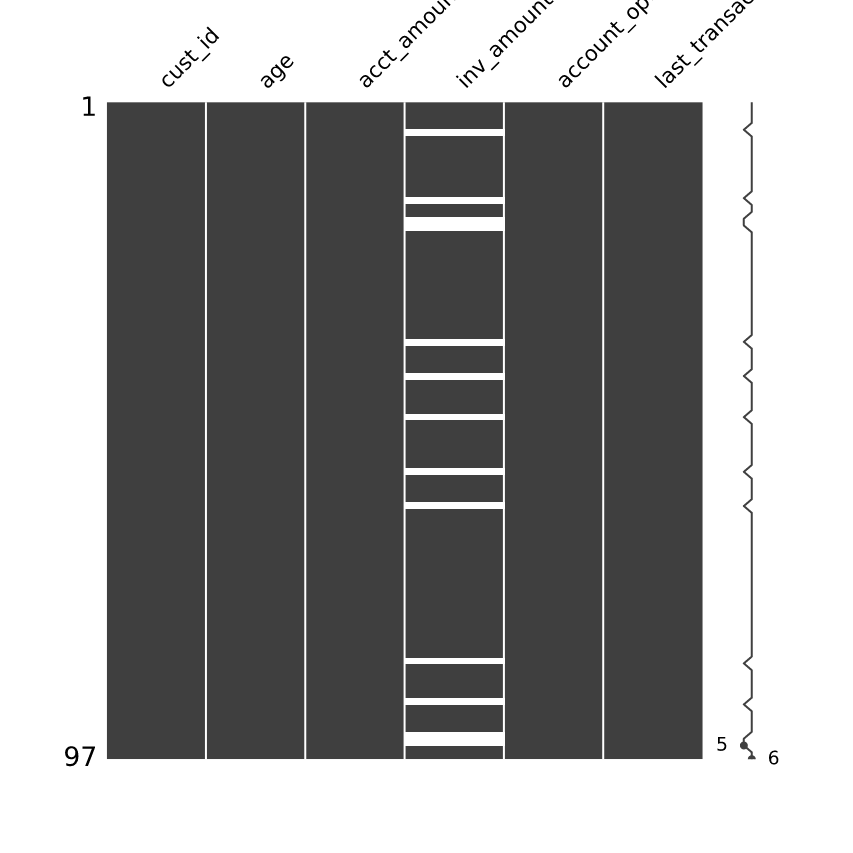

In [ ]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]



```
# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]
cust_id              0
age                  0
acct_amount          0
inv_amount          13
account_opened       0
last_transaction     0
dtype: int64

<script.py> output:
    cust_id              0
    age                  0
    acct_amount          0
    inv_amount          13
    account_opened       0
    last_transaction     0
    dtype: int64```





```
Sort the banking DataFrame by the age column and plot the missingness matrix of banking_sorted.

```



In [ ]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

# Sort banking by age and visualize
banking_sorted = banking.sort_values(by = 'age')
msno.matrix(banking_sorted)
plt.show()

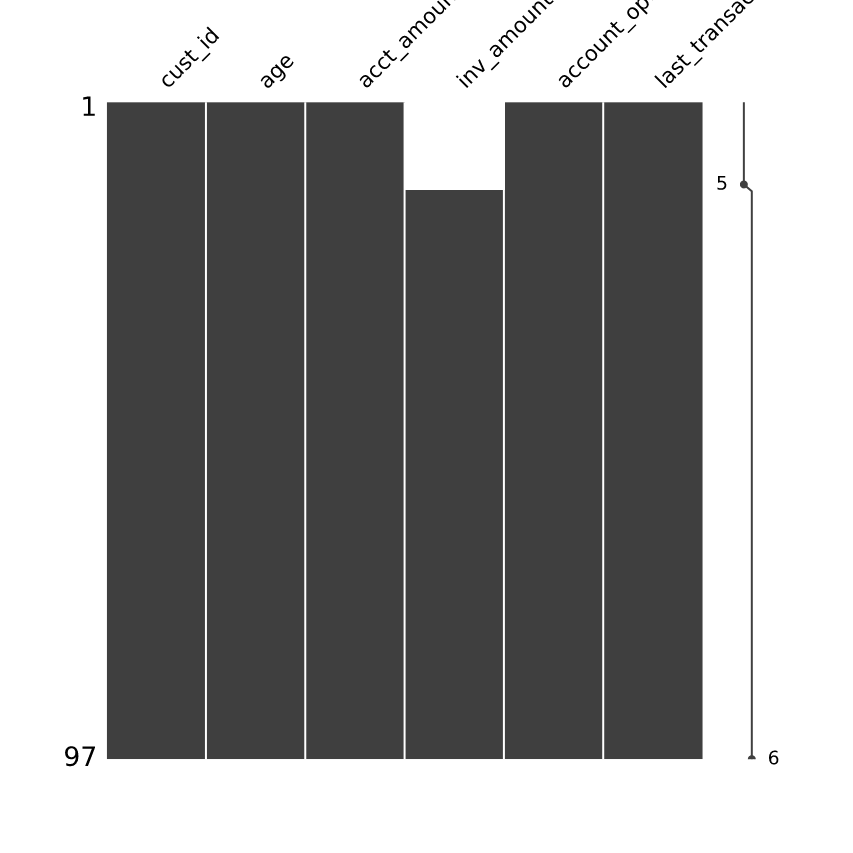

# Follow the money
In this exercise, you're working with another version of the banking DataFrame that contains missing values for both the cust_id column and the acct_amount column.

You want to produce analysis on how many unique customers the bank has, the average amount held by customers and more. You know that rows with missing cust_id don't really help you, and that on average acct_amount is usually 5 times the amount of inv_amount.

In this exercise, you will drop rows of banking with missing cust_ids, and impute missing values of acct_amount with some domain knowledge.

In [ ]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount'] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({
    'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())



```
<script.py> output:
    cust_id             0
    acct_amount         0
    inv_amount          0
    account_opened      0
    last_transaction    0
    dtype: int64
    
    ```



# The cutoff point

In this exercise, and throughout this chapter, you'll be working with the restaurants DataFrame which has data on various restaurants. Your ultimate goal is to create a restaurant recommendation engine, but you need to first clean your data.


This version of restaurants has been collected from many sources, where the cuisine_type column is riddled with typos, and should contain only italian, american and asian cuisine types. There are so many unique categories that remapping them manually isn't scalable, and it's best to use string similarity instead.



Before doing so, you want to establish the cutoff point for the similarity score using the thefuzz's process.extract() function by finding the similarity score of the most distant typo of each category.

In [ ]:
# Import process from thefuzz
from thefuzz import process

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['cuisine_type'].unique()

# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit = len(unique_types)))



```
Import process from thefuzz.
Store the unique cuisine_types into unique_types.
Calculate the similarity of 'asian', 'american', and 'italian' to all possible cuisine_types using process.extract(), while returning all possible matches.

```



In [ ]:
# Iterate through categories
for cuisine in categories: 
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))

  # Iterate through the list of matches
  for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurants.loc[restaurants['cuisine_type'] == match[0]] = cuisine  
      
# Inspect the final result
print(restaurants['cuisine_type'].unique())

# Pairs of restaurants
In the last lesson, you cleaned the restaurants dataset to make it ready for building a restaurants recommendation engine. You have a new DataFrame named restaurants_new with new restaurants to train your model on, that's been scraped from a new data source.

You've already cleaned the cuisine_type and city columns using the techniques learned throughout the course. However you saw duplicates with typos in restaurants names that require record linkage instead of joins with restaurants.

In this exercise, you will perform the first step in record linkage and generate possible pairs of rows between restaurants and restaurants_new. Both DataFrames, pandas and recordlinkage are in your environment.

In [ ]:
# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()

# Block pairing on cuisine_type
indexer.block('cuisine_type')

# Generate pairs
pairs = indexer.index(restaurants, restaurants_new)

# Linking them together!
In the last lesson, you've finished the bulk of the work on your effort to link restaurants and restaurants_new. You've generated the different pairs of potentially matching rows, searched for exact matches between the cuisine_type and city columns, but compared for similar strings in the rest_name column. You stored the DataFrame containing the scores in potential_matches.

Now it's finally time to link both DataFrames. You will do so by first extracting all row indices of restaurants_new that are matching across the columns mentioned above from potential_matches. Then you will subset restaurants_new on these indices, then append the non-duplicate values to restaurants. All DataFrames are in your environment, alongside pandas imported as pd.

In [ ]:
# Isolate potential matches with row sum >=3
matches = potential_matches[potential_matches.sum(axis = 1) >= 3]

# Get values of second column index of matches
matching_indices = matches.index.get_level_values(1)

# Subset restaurants_new based on non-duplicate values
non_dup = restaurants_new[~restaurants_new.index.isin(matching_indices)]

# Append non_dup to restaurants
full_restaurants = restaurants.append(non_dup)
print(full_restaurants)



```
<script.py> output:
                        rest_name                  rest_addr               city       phone cuisine_type
    0   arnie morton's of chicago   435 s. la cienega blv .         los angeles  3102461501     american
    1          art's delicatessen       12224 ventura blvd.         studio city  8187621221     american
    2                   campanile       624 s. la brea ave.         los angeles  2139381447     american
    3                       fenix    8358 sunset blvd. west           hollywood  2138486677     american
    4          grill on the alley           9560 dayton way         los angeles  3102760615     american
    ..                        ...                        ...                ...         ...          ...
    76                        don        1136 westwood blvd.           westwood  3102091422      italian
    77                      feast        1949 westwood blvd.            west la  3104750400      chinese
    78                   mulberry        17040 ventura blvd.             encino  8189068881        pizza
    80                    jiraffe      502 santa monica blvd       santa monica  3109176671  californian
    81                   martha's  22nd street grill 25 22nd  st. hermosa beach  3103767786     american
    
    [396 rows x 5 columns]```

